#### Data Cleaning

In [1]:
# !pip install openpyxl
import pandas as pd

In [2]:
base_path = 'C:\\Users\\Sherry\\Desktop\\fall2024\\5900\\data\\'
pageview = pd.read_csv(f'{base_path}Copy of Identified_Web_Pagviews_08022024.csv')

In [3]:
pageview.columns = pageview.columns.str.lower()
pageview.head()

,l2_rise_number,date,page,views
0,A-1003590386,2022-08-19,Digital Business Services & Printing Solutions...,36.0
1,A-1003321474,2024-05-15,Digital Business Services & Printing Solutions...,50.0
2,A-1003590386,2022-08-11,Digital Business Services & Printing Solutions...,22.0
3,A-0013220318,2020-12-16,Purchase Order Terms and Conditions | Ricoh USA,15.0
4,O-19272702,2021-01-06,Product Stewardship and Recycling | Ricoh USA,7.0


In [19]:
# filter views in page
views_date = [
    'l2_rise_number', 'date', 'views'
]

page_views = pageview[views_date]
page_views.head()

,l2_rise_number,date,views
0,A-1003590386,2022-08-19,36.0
1,A-1003321474,2024-05-15,50.0
2,A-1003590386,2022-08-11,22.0
3,A-0013220318,2020-12-16,15.0
4,O-19272702,2021-01-06,7.0


In [5]:
opp = pd.read_excel(f'{base_path}Copy of Ricoh_Opps_08022024.xlsx')

In [6]:
opp.columns = opp.columns.str.lower()
opp.head()

,key,lead_number,opportunity_number,quote_number,order_number,l2_rise_number,funnel_stage,lead_status_name,lead_sub_source,lead_primary_product,...,svc_calls,cv,mif,renewal,sat,nps,department,job_type,employees_dnb,sales_dnb
0,O-1001591177,NaN,O-1001591177,NaN,NaN,A-1000882103,SQL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,1965.0,2.346090e+06
1,O-1000558710,NaN,O-1000558710,NaN,NaN,A-0013759349,SQL,NaN,NaN,NaN,...,2233.0,144586274.0,1670.0,0.0,NaN,NaN,Operations / Compliance / Reco,Director,1683.0,2.579766e+09
2,O-1002059945,NaN,O-1002059945,NaN,NaN,A-0013508952,SQL,NaN,NaN,NaN,...,3210.0,719873594.0,26046.0,1.0,NaN,NaN,Procurement / Purchasing,Consultant,275502.0,8.529614e+10
3,O-1002269225,NaN,O-1002269225,NaN,NaN,A-1000882135,SQL,NaN,NaN,NaN,...,3501.0,379055914.0,2485.0,1105.0,8.67,8.33,Administration,Manager / Supervisor,230.0,3.033240e+07
4,O-1001952436,NaN,O-1001952436,NaN,NaN,A-0013508952,SQL,NaN,NaN,NaN,...,3089.0,725387056.0,26098.0,2.0,NaN,NaN,NaN,Director,275502.0,8.529614e+10


In [7]:
# fill na data
opp['lead_date'].fillna(pd.NaT, inplace=True)
opp['opp_date'].fillna(pd.NaT, inplace=True)
opp['quote_date'].fillna(pd.NaT, inplace=True)
opp['order_date'].fillna(pd.NaT, inplace=True)
opp['close_date'].fillna(pd.NaT, inplace=True)
opp['start_date'].fillna(pd.NaT, inplace=True)

In [ ]:
# Consider only closed deals
opp_closed = opp[opp.closed == 1]

In [76]:
# filter date in opp
date = [
    'l2_rise_number', 'lead_date', 'opp_date', 'quote_date',
    'order_date', 'close_date', 'start_date'
]

opp_date = opp_closed[date]
opp_date.count()

l2_rise_number    649908
lead_date         123757
opp_date          617183
quote_date        435129
order_date        138287
close_date        617171
start_date        724224
dtype: int64

In [ ]:
# opp_date too large to merge, crashed several times while join.
# try top 10% only.
top_10_percent_threshold = opp_closed['order_rev'].quantile(0.90)
top_deals = opp_closed[opp_closed['order_rev'] > top_10_percent_threshold]

opp_top_date = top_deals[date]
opp_top_date.count()

l2_rise_number    6907
lead_date           78
opp_date          6909
quote_date        6909
order_date        6909
close_date        6909
start_date        6909
dtype: int64

In [79]:
page_date = pd.merge(page_views, opp_top_date, how = 'right', on = 'l2_rise_number')
page_date.head()

,l2_rise_number,date,views,lead_date,opp_date,quote_date,order_date,close_date,start_date
0,A-1006056777,NaN,NaN,NaT,2023-01-26,2023-01-27,2023-01-27,2023-05-27,2023-01-26
1,A-1003108403,2022-11-17,8.0,NaT,2024-06-14,2024-06-21,2024-06-21,2024-06-28,2024-06-14
2,A-1003108403,2022-12-01,9.0,NaT,2024-06-14,2024-06-21,2024-06-21,2024-06-28,2024-06-14
3,A-1003108403,2023-01-05,7.0,NaT,2024-06-14,2024-06-21,2024-06-21,2024-06-28,2024-06-14
4,A-1003108403,2021-11-04,7.0,NaT,2024-06-14,2024-06-21,2024-06-21,2024-06-28,2024-06-14


#### Time Series Graph

In [26]:
import matplotlib.pyplot as plt

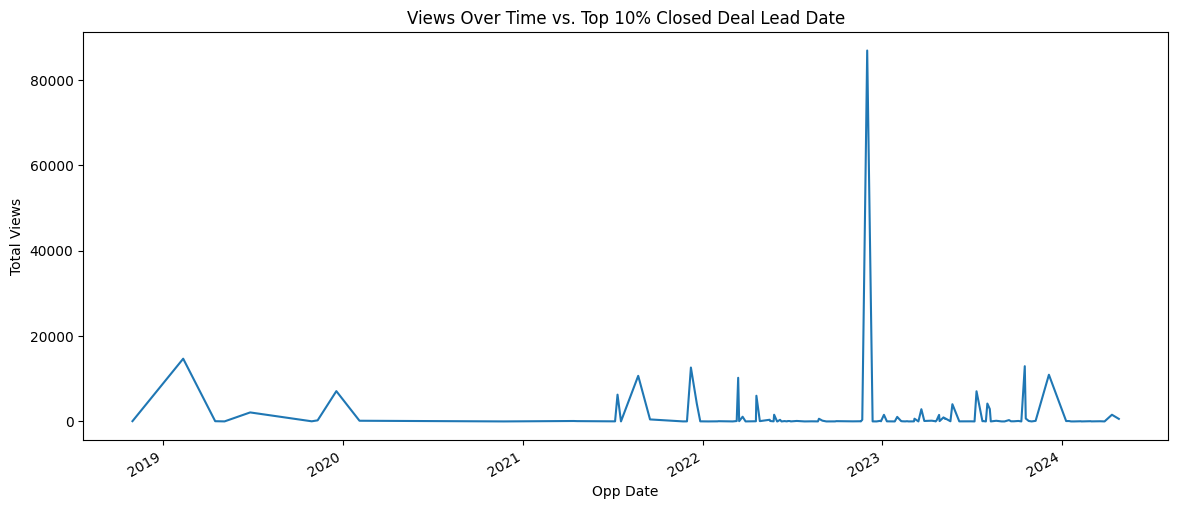

In [70]:
page_date['lead_date'] = pd.to_datetime(page_date['lead_date'], errors='coerce')

# Aggregate views by date
views_by_lead_date = page_date.groupby('lead_date')['views'].sum()

# Time series plot
plt.figure(figsize=(14,6))
views_by_lead_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Lead Date')
plt.xlabel('Opp Date')
plt.ylabel('Total Views')
plt.show()

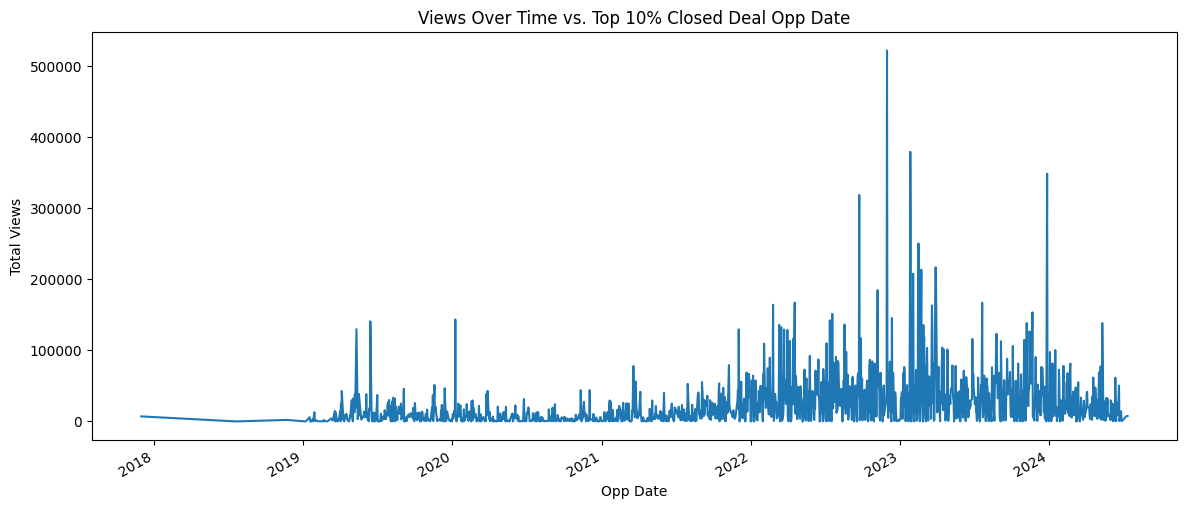

In [52]:
page_date['opp_date'] = pd.to_datetime(page_date['opp_date'], errors='coerce')

# Aggregate views by date
views_by_opp_date = page_date.groupby('opp_date')['views'].sum()

# Time series plot
plt.figure(figsize=(14,6))
views_by_opp_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Opp Date')
plt.xlabel('Opp Date')
plt.ylabel('Total Views')
plt.show()

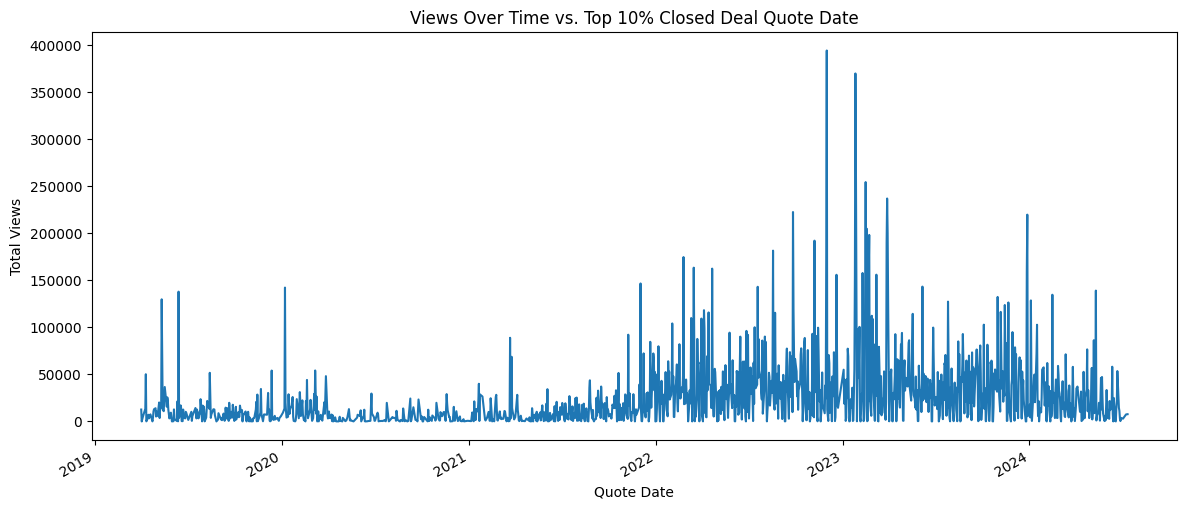

In [80]:
page_date['quote_date'] = pd.to_datetime(page_date['quote_date'], errors='coerce')

# Aggregate views by date
views_by_quote_date = page_date.groupby('quote_date')['views'].sum()

# Time series plot
plt.figure(figsize=(14,6))
views_by_quote_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Quote Date')
plt.xlabel('Quote Date')
plt.ylabel('Total Views')
plt.show()

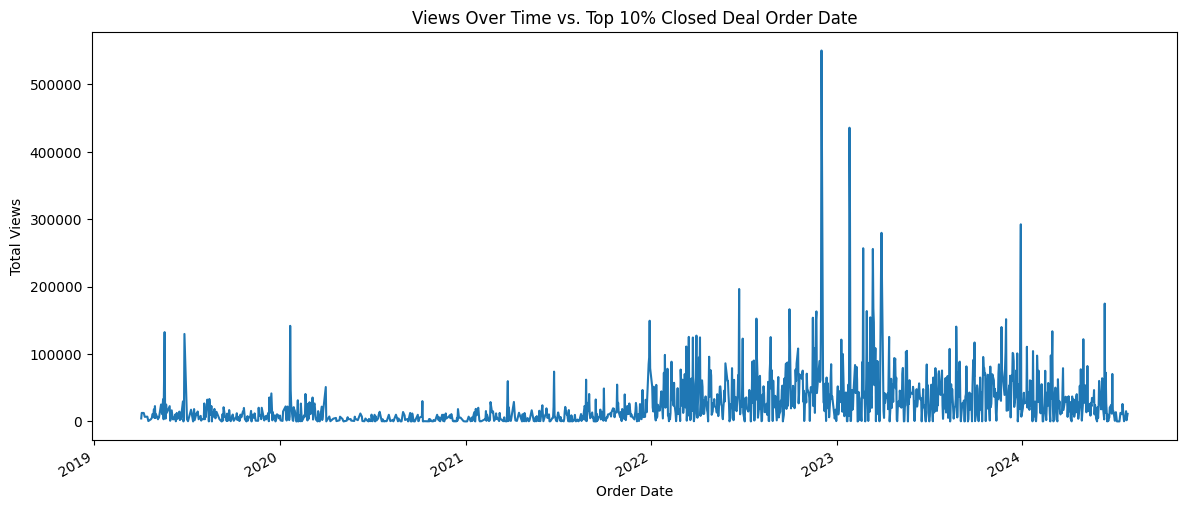

In [53]:
page_date['order_date'] = pd.to_datetime(page_date['order_date'], errors='coerce')

# Aggregate views by date
views_by_order_date = page_date.groupby('order_date')['views'].sum()

# Time series plot
plt.figure(figsize=(14,6))
views_by_order_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Views')
plt.show()

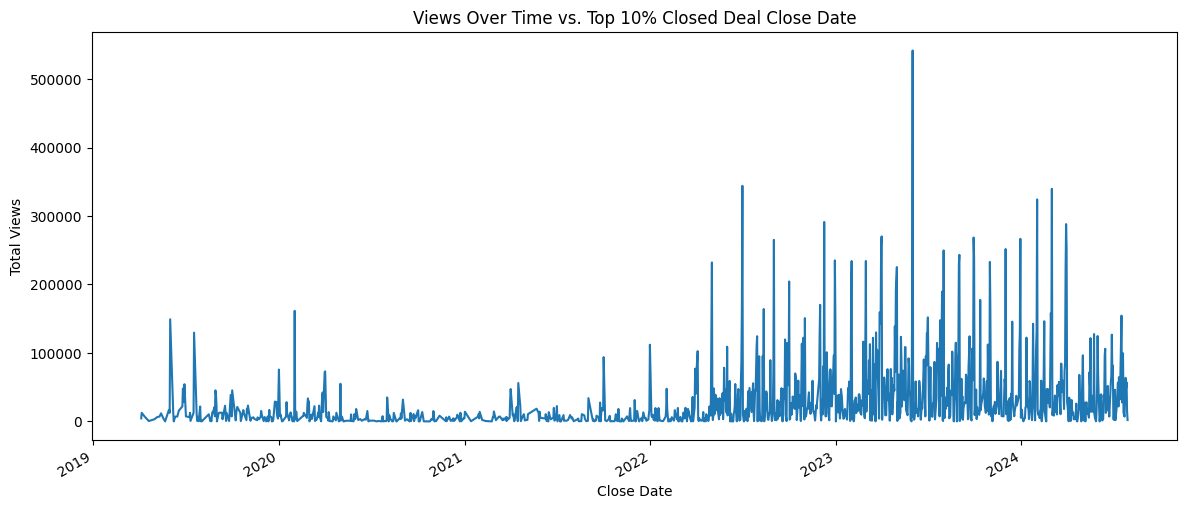

In [54]:
page_date['close_date'] = pd.to_datetime(page_date['close_date'], errors='coerce')

# Aggregate views by date
views_by_close_date = page_date.groupby('close_date')['views'].sum()

# Time series plot
plt.figure(figsize=(14,6))
views_by_close_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Close Date')
plt.xlabel('Close Date')
plt.ylabel('Total Views')
plt.show()

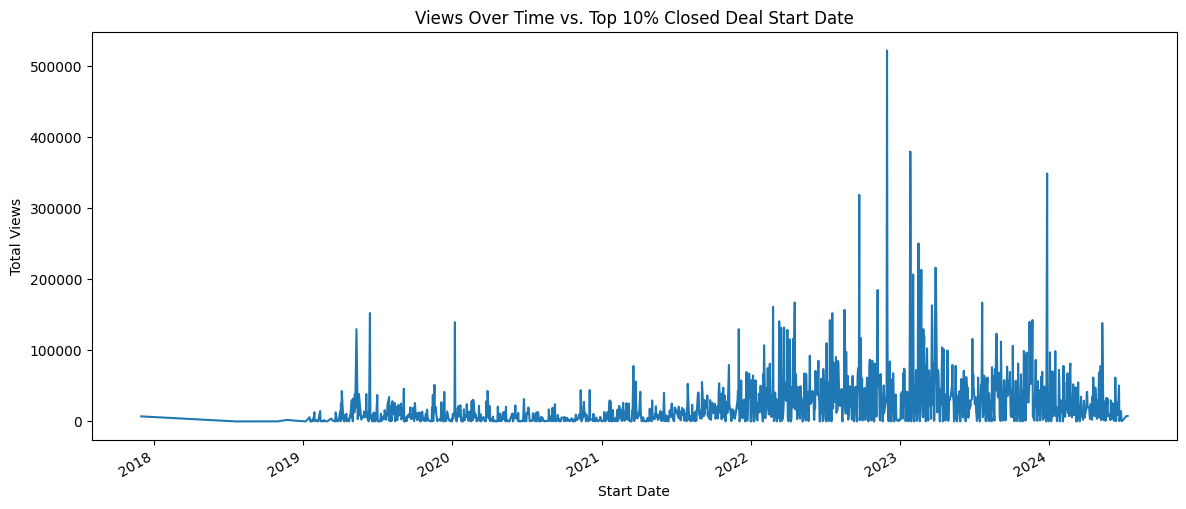

In [55]:
page_date['start_date'] = pd.to_datetime(page_date['start_date'], errors='coerce')

# Aggregate views by date
views_by_start_date = page_date.groupby('start_date')['views'].sum()

# Time series plot
plt.figure(figsize=(14,6))
views_by_start_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Start Date')
plt.xlabel('Start Date')
plt.ylabel('Total Views')
plt.show()

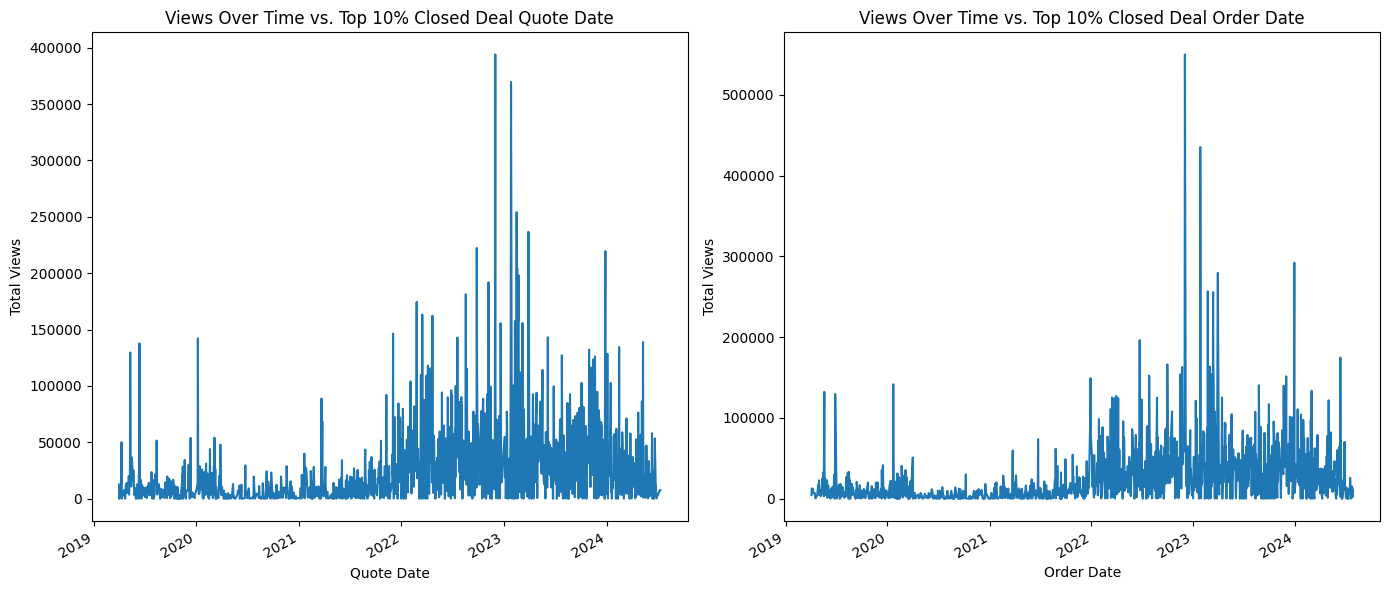

In [82]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
views_by_order_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Order Date')
plt.xlabel('Order Date')
plt.ylabel('Total Views')

plt.subplot(1, 2, 1)
views_by_quote_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Quote Date')
plt.xlabel('Quote Date')
plt.ylabel('Total Views')

# Adjust layout
plt.tight_layout()
plt.show()

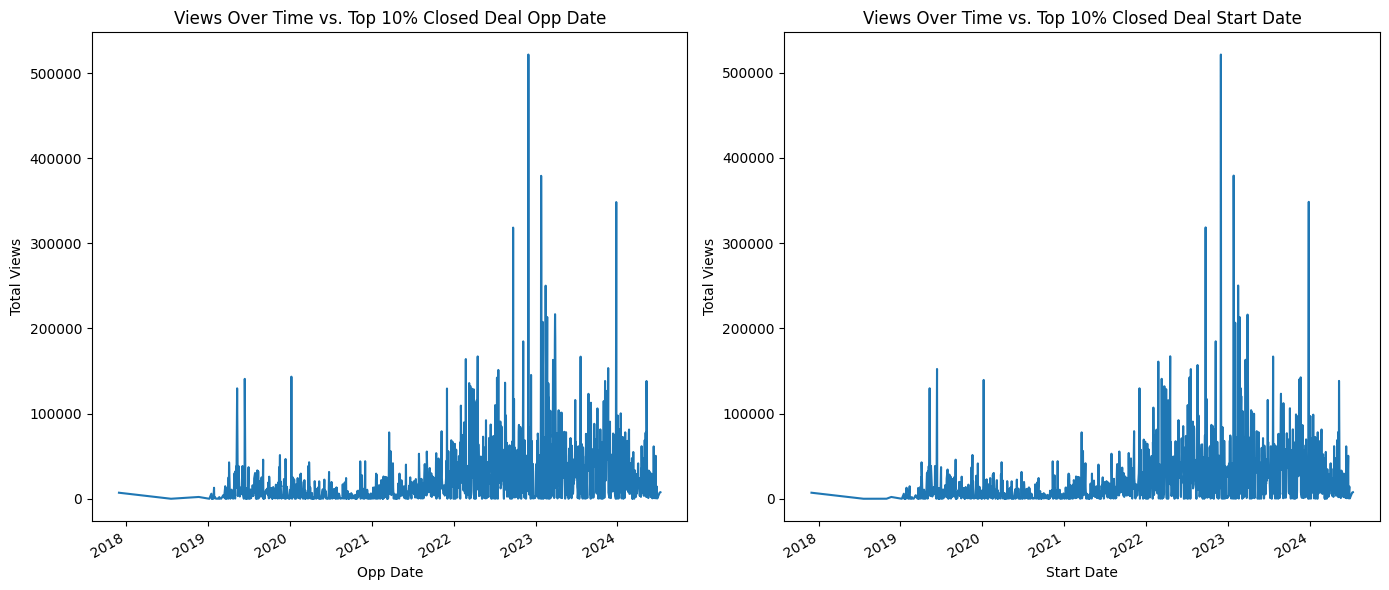

In [72]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
views_by_opp_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Opp Date')
plt.xlabel('Opp Date')
plt.ylabel('Total Views')

plt.subplot(1, 2, 2)
views_by_start_date.plot()
plt.title('Views Over Time vs. Top 10% Closed Deal Start Date')
plt.xlabel('Start Date')
plt.ylabel('Total Views')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# top 5 deal & bottom 5 deals
# backwards from the close date
# seek one by one